# Pypi download statistics of napari plugins in May 2022
This notebook downloads and visualizes download statistics of napari plugins downloaded from pypi. It uses the APIs of the [napari hub](https://www.napari-hub.org/) and [pypistats](https://pypistats.org/) (big thanks to the providers!).

Before over-interpreting the presented data, please be aware of:
* the number of downloads is typically higher than the number of users,
* plugins that are dependencies of other plugins appear downloaded more often,
* plugins downloaded via conda-forge are not counted,
* plugins that serve as python libraries also for other purposes may be overestimated in the napari-plugin context,
* plugins downloaded via automated test suites may be counted as well and
* [gamification](https://en.wikipedia.org/wiki/Gamification).

In [1]:
import pandas as pd
import urllib, json
import matplotlib.pyplot as plt
import time

In [2]:
def get_all_plugin_data():
    """Get list of all plugins from the napari hub"""
    url = 'https://api.napari-hub.org/plugins'

    json_url = urllib.request.urlopen(url) 
    data = json.loads(json_url.read()) 
    
    return list(data.keys())

def get_plugin_details(plugin_name, try_again=True):
    """Retrieve download statistics about one particular plugin from pypistats"""
    time.sleep(5)
    print(plugin_name)
    url = 'https://pypistats.org/api/packages/' + plugin_name.lower() + '/recent'

    try:
        json_url = urllib.request.urlopen(url) 
        data = json.loads(json_url.read()) 
        #print (data)
        return data
    except urllib.error.HTTPError as err:
        print("Error loading", plugin_name, err)
        if "TOO MANY REQUESTS" in str(err) and try_again:
            time.sleep(5)
            return get_plugin_details(plugin_name, try_again=False)

def get_stats(plugins, try_again=True):
    """Retrieve download statistics of all listed plugins"""
    download_stats = {}

    for p in plugins:
        details = get_plugin_details(p.replace(" +", ""))
        if details is not None and 'data' in details:
            download_stats[p] = details['data']

    return download_stats
           
def sort_by_value(x, column='last_month'):
    """Sort downloads by month/week/day"""
    return {k: v for k, v in sorted(x.items(), key=lambda item: item[1][column])}

def plot_data(df, column='last_month', width=15,height=55):
    """Plot plugin download data as bar graph"""
    f, ax = plt.subplots(1,1,figsize=(width,height))
    ax.axis('off')
    for i, x in enumerate(df.package):
        plt.barh(i, df[column][i], color = 'grey')
        ax.text(0, i, x, ha='right', fontsize='large')

def to_pandas(data):
    """Convert array data to a pandas DataFrame"""
    entries = ['last_month', 'last_week', 'last_day']
    df = pd.DataFrame({k: [k] + [v[e] for e in entries] for k, v in data.items()}).transpose()
    df.columns = ['package'] + entries
    return df

In [3]:
all_plugins = get_all_plugin_data()

In [4]:
# Remove plugins from the statistics that are shipped together with napari
remove_plugins = ["napari-console", "napari-svg"]
for r in remove_plugins:
    if r in all_plugins:
        all_plugins.remove(r)

In [5]:
download_stats = get_stats(all_plugins)

Image-Composer
Image-Part-Selecter
Label-Creator
Layer-Data-Replace
Offset-Subtraction
PartSeg
Partial-Aligner
PlatyMatch
RedLionfish
World2Data
affinder
arcos-gui
bbii-decon
beetlesafari
bfio
blik
brainglobe-napari-io
brainreg-napari
brainreg-segment
cellfinder-napari
cellpose-napari
devbio-napari
elastix-napari
empanada-napari
faser
Error loading faser HTTP Error 404: NOT FOUND
grabber-ift
iacs-ipac-reader
misic-napari
morphometrics
napari-3d-ortho-viewer
napari-DeepSpot
napari-IDS
napari-IP-workflow
napari-J
napari-PHILOW
napari-accelerated-pixel-and-object-classification
napari-aicsimageio
napari-aideveloper
napari-allencell-segmenter
napari-animated-gif-io
napari-animation
napari-annotator
napari-apr-viewer
napari-arboretum
napari-assistant
napari-bigwarp
napari-bil-data-viewer
napari-bioformats
napari-blob-detection
napari-brightness-contrast
napari-brushsettings
napari-btrack-reader
napari-ccp4map
napari-checkerboard
napari-clemreg
napari-clusters-plotter
napari-compressed-label

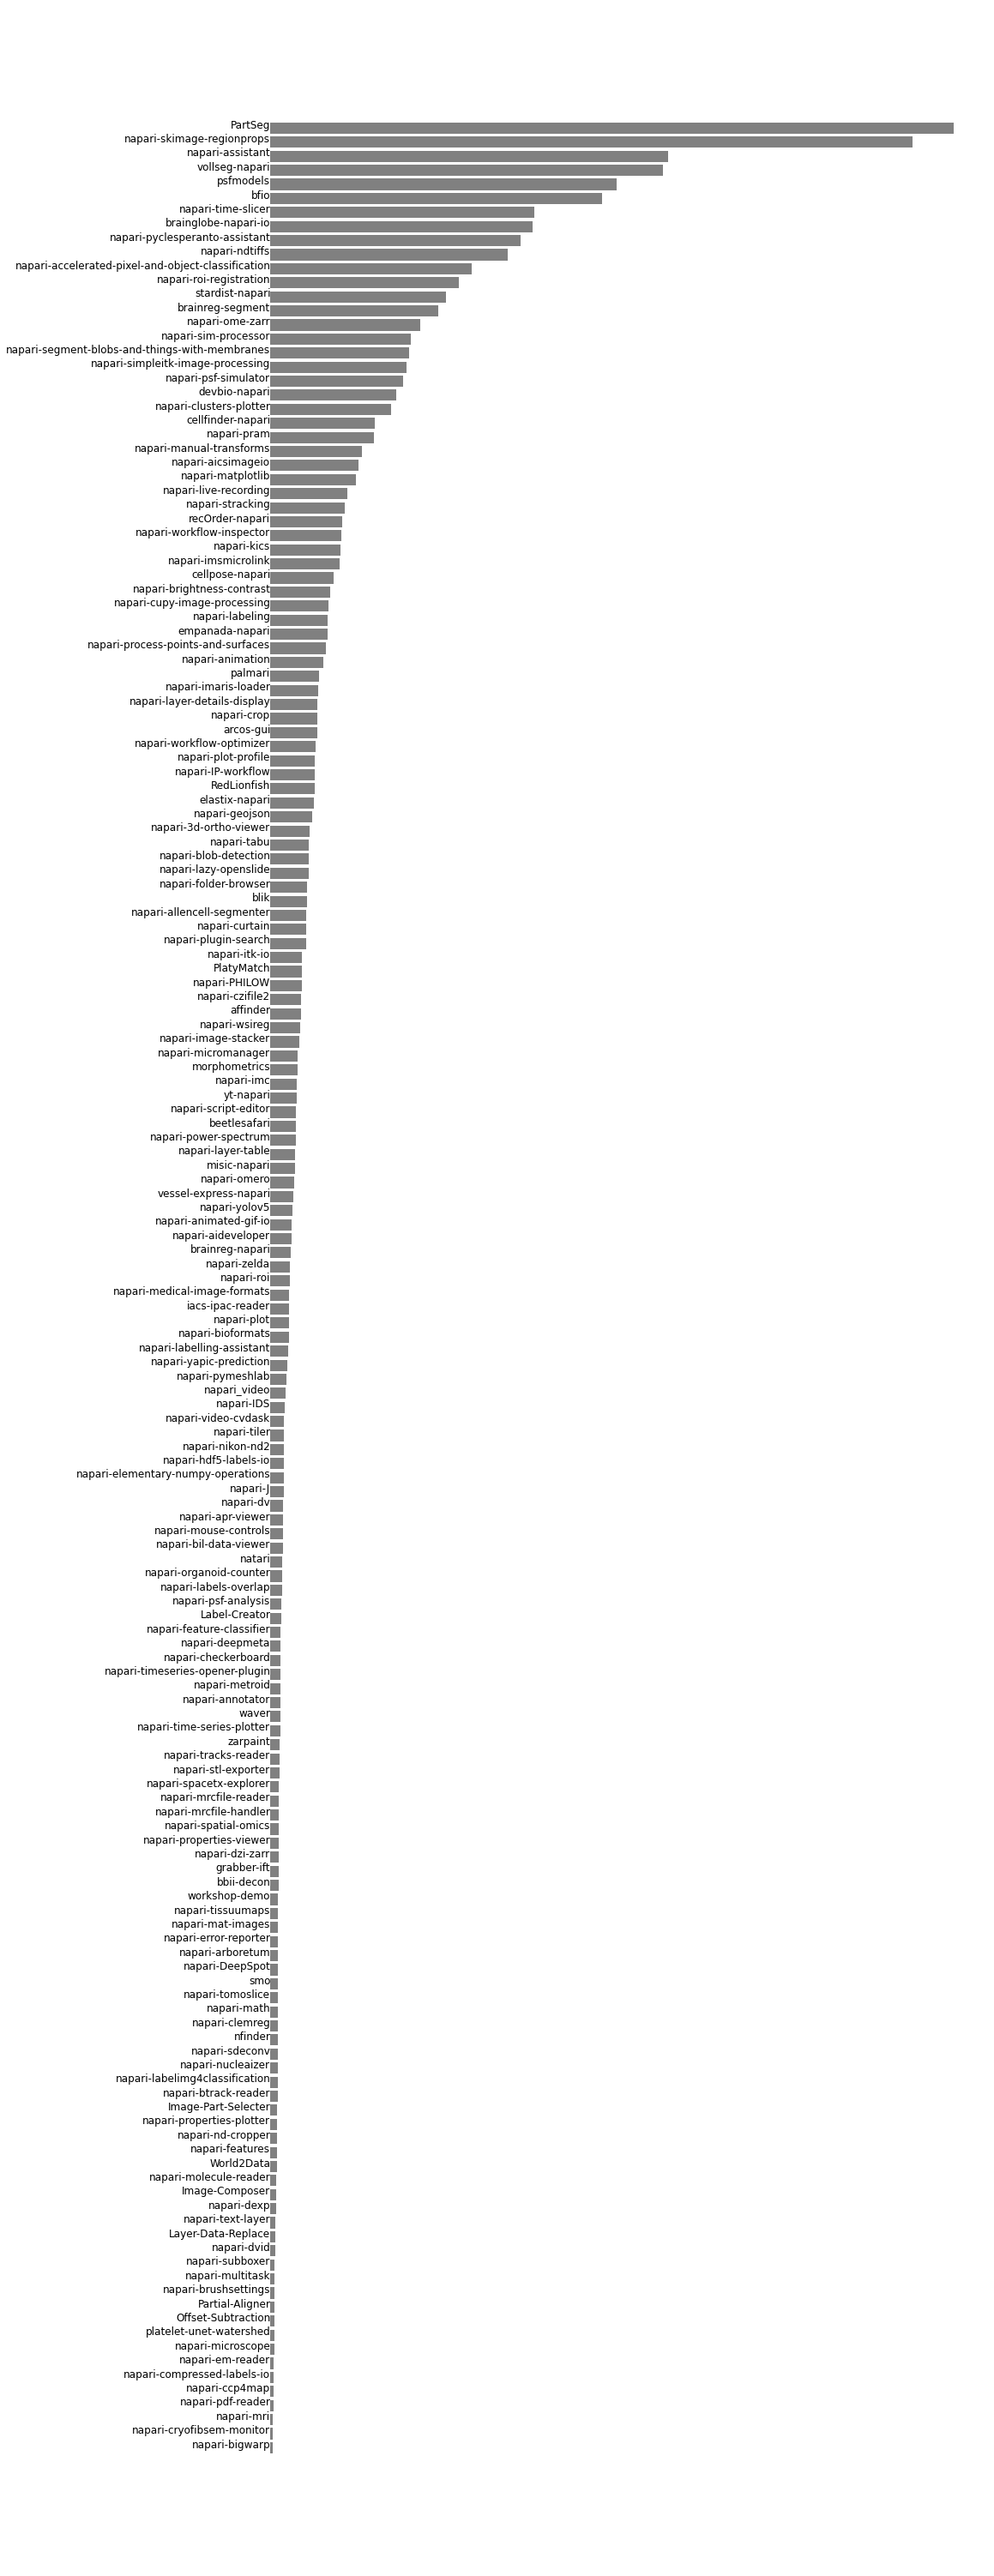

In [6]:
df = to_pandas(sort_by_value(download_stats, 'last_month'))
df.to_csv('pypistats_20220523.csv')
plot_data(df, 'last_month')

In [7]:
pd.set_option('display.max_rows', df.shape[0]+1)
df

,package,last_month,last_week,last_day
napari-bigwarp,napari-bigwarp,7,0,0
napari-cryofibsem-monitor,napari-cryofibsem-monitor,7,2,0
napari-mri,napari-mri,7,2,0
napari-pdf-reader,napari-pdf-reader,8,0,0
napari-ccp4map,napari-ccp4map,9,0,0
napari-compressed-labels-io,napari-compressed-labels-io,9,0,0
napari-em-reader,napari-em-reader,9,0,0
napari-microscope,napari-microscope,10,2,0
platelet-unet-watershed,platelet-unet-watershed,10,0,0
Offset-Subtraction,Offset-Subtraction,11,0,0
